## Importing the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Loading the Dataset

In [3]:
df = pd.read_csv('iris.csv', index_col = 0) # Using the first column of the dataset as index
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


## Basic Analysis

In [5]:
df.shape

(150, 5)

In [6]:
df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [8]:
for i in df.columns:
    print(f'The Unique Values in {i} are:', np.sort(df[i].unique()), sep = '\n')

The Unique Values in Sepal_Length are:
[4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.
 6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.6 7.7 7.9]
The Unique Values in Sepal_Width are:
[2.  2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8
 3.9 4.  4.1 4.2 4.4]
The Unique Values in Petal_Length are:
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.9 3.  3.3 3.5 3.6 3.7 3.8 3.9 4.  4.1
 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9
 6.  6.1 6.3 6.4 6.6 6.7 6.9]
The Unique Values in Petal_Width are:
[0.1 0.2 0.3 0.4 0.5 0.6 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1
 2.2 2.3 2.4 2.5]
The Unique Values in Species are:
['setosa' 'versicolor' 'virginica']


In [10]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df.describe(include = ['O'])

,Species
count,150
unique,3
top,setosa
freq,50


In [16]:
df['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## Exploratory Data Analysis

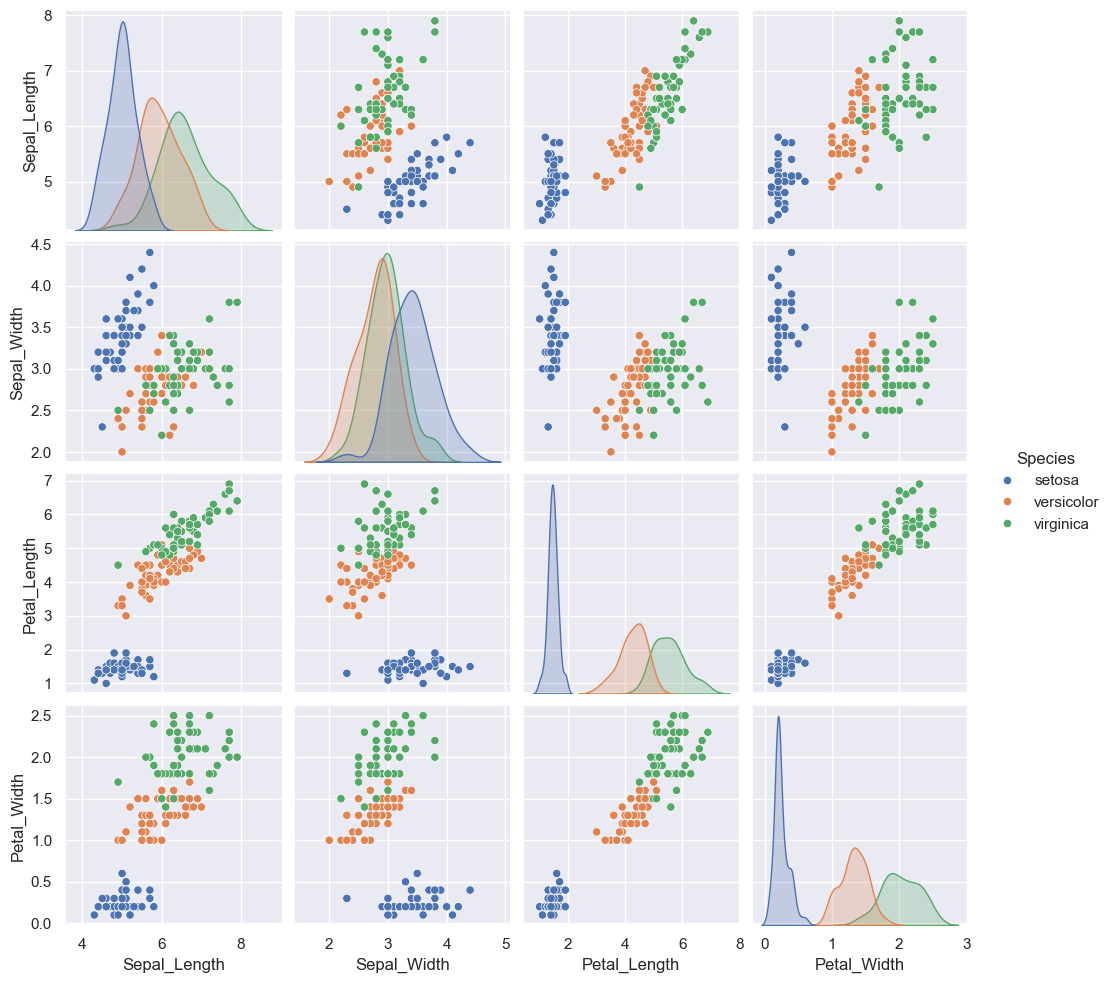

In [22]:
sns.pairplot(df, hue = 'Species')

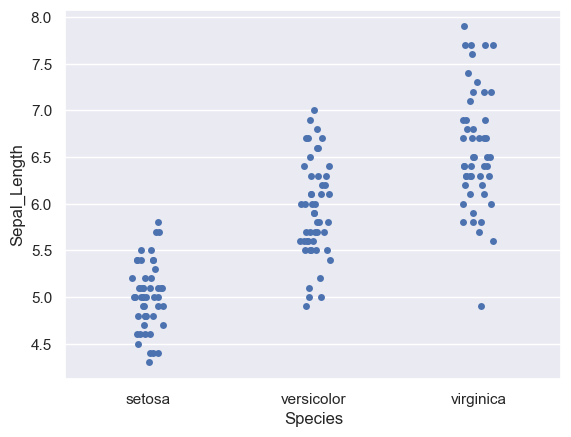

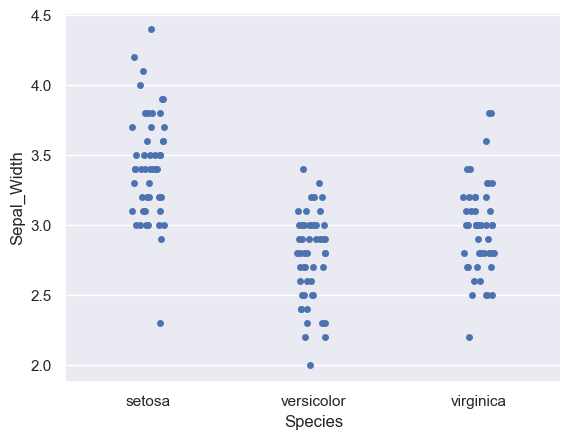

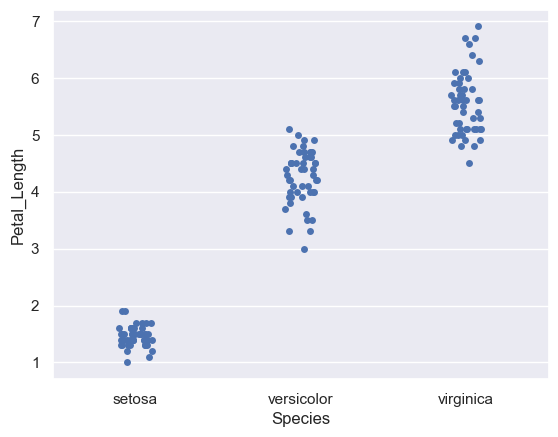

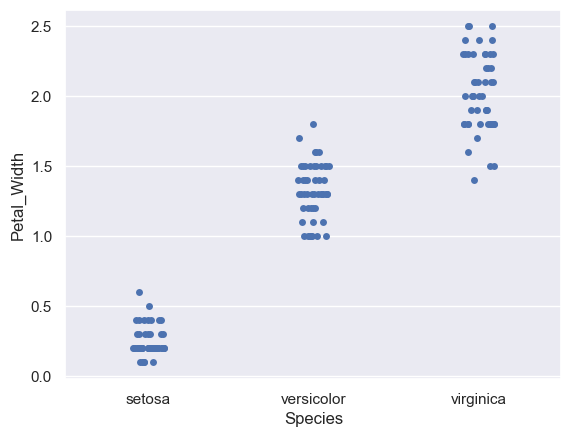

In [23]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.stripplot(x = df['Species'], y = df[i])
        plt.show()

In [24]:
for i in df.columns:
    if df[i].dtype != 'object':
        print(pd.pivot_table(data = df, index = 'Species', values = i, aggfunc = 'mean'))
        print('\n')

            Sepal_Length
Species                 
setosa             5.006
versicolor         5.936
virginica          6.588


            Sepal_Width
Species                
setosa            3.428
versicolor        2.770
virginica         2.974


            Petal_Length
Species                 
setosa             1.462
versicolor         4.260
virginica          5.552


            Petal_Width
Species                
setosa            0.246
versicolor        1.326
virginica         2.026




## Standarizing the Data

In [47]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
X = df.drop('Species', axis = 1)

In [51]:
scaler.fit(X)

StandardScaler()

In [53]:
scaled_features = scaler.transform(X)

In [55]:
df_scaled = pd.DataFrame(scaled_features, columns = df.columns[:-1])
df_scaled.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## Encoding the Object Column(s)

In [58]:
from sklearn.preprocessing import LabelEncoder

In [60]:
y = LabelEncoder().fit_transform(df['Species'].values)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Train Test Split

In [63]:
from sklearn.model_selection import train_test_split

In [65]:
np.random.seed(1234)
X_Train, X_Test, y_Train, y_Test = train_test_split(scaled_features, y, test_size = .50)

## KNN using Cross Validation

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
from sklearn.model_selection import cross_val_score

In [72]:
accuracy = []
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn, df_scaled, y, cv = 10)
    accuracy.append(score.mean()) 

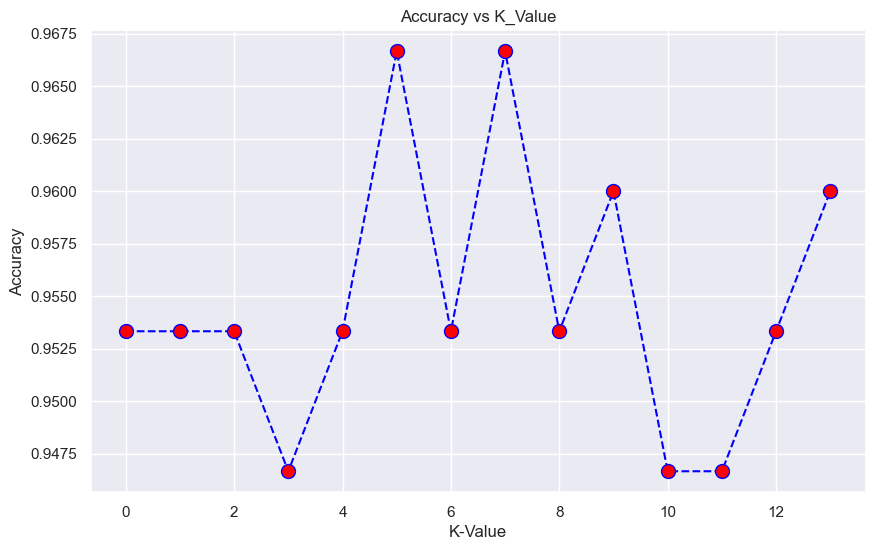

In [73]:
plt.figure(figsize = (10,6))
plt.plot(accuracy, linestyle = 'dashed', marker = 'o', markersize = 10, markerfacecolor = 'red', color = 'blue')
plt.ylabel('Accuracy')
plt.xlabel('K-Value')
plt.title('Accuracy vs K_Value')
plt.show()

### Here we see that the Accuracy of the model hits the highest at K = 5, 7. So, we will use K as 5

In [77]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_Train, y_Train)

KNeighborsClassifier()

In [79]:
pred = knn.predict(X_Test)

## Predictions and Evaluations

In [82]:
from sklearn.metrics import classification_report, confusion_matrix

In [84]:
print(confusion_matrix(y_Test, pred))

[[25  0  0]
 [ 0 25  0]
 [ 0  3 22]]


In [86]:
print(classification_report(y_Test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.89      1.00      0.94        25
           2       1.00      0.88      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

